In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forbes-billionaires-of-2021/Billionaire.csv


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df=pd.read_csv('/kaggle/input/forbes-billionaires-of-2021/Billionaire.csv')
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [84]:
df.describe()

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


<Axes: >

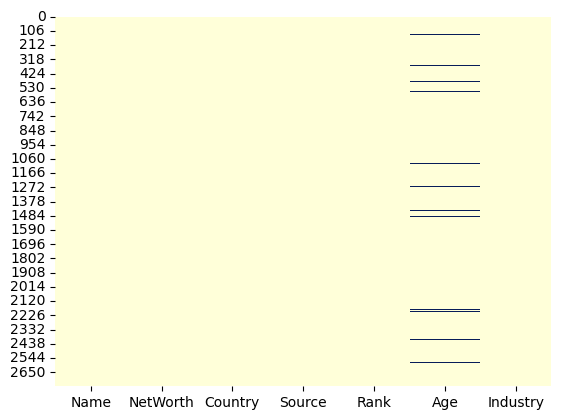

In [86]:
sns.heatmap(df.isnull(),cmap='YlGnBu', cbar=False)

Checking the null values in datset  
**Later we can check if the imputation is possible for Age with another variable correlation**

In [87]:
#changing the networth column to float
df['NetWorth'] = df['NetWorth'].str.replace('$', '')  # Remove dollar sign
df['NetWorth'] = df['NetWorth'].str.replace(' B', '')  # Remove "B" symbol
df['NetWorth'] = df['NetWorth'].astype(float)  # Convert to float

/tmp/ipykernel_32/1640651923.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['NetWorth'] = df['NetWorth'].str.replace('$', '')  # Remove dollar sign


[Text(0, 0, 'United States'),
 Text(1, 0, 'France'),
 Text(2, 0, 'India'),
 Text(3, 0, 'Spain'),
 Text(4, 0, 'China'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Japan'),
 Text(7, 0, 'Canada'),
 Text(8, 0, 'Germany'),
 Text(9, 0, 'Italy'),
 Text(10, 0, 'Hong Kong'),
 Text(11, 0, 'Russia'),
 Text(12, 0, 'Austria'),
 Text(13, 0, 'Australia'),
 Text(14, 0, 'Chile'),
 Text(15, 0, 'Singapore'),
 Text(16, 0, 'Sweden'),
 Text(17, 0, 'Indonesia'),
 Text(18, 0, 'Thailand'),
 Text(19, 0, 'Czechia'),
 Text(20, 0, 'United Kingdom'),
 Text(21, 0, 'Brazil'),
 Text(22, 0, 'Netherlands'),
 Text(23, 0, 'Ireland'),
 Text(24, 0, 'South Korea'),
 Text(25, 0, 'Denmark'),
 Text(26, 0, 'Malaysia'),
 Text(27, 0, 'Nigeria'),
 Text(28, 0, 'Israel'),
 Text(29, 0, 'Colombia'),
 Text(30, 0, 'Switzerland'),
 Text(31, 0, 'Cyprus'),
 Text(32, 0, 'Belgium'),
 Text(33, 0, 'New Zealand'),
 Text(34, 0, 'Egypt'),
 Text(35, 0, 'South Africa'),
 Text(36, 0, 'Ukraine'),
 Text(37, 0, 'Greece'),
 Text(38, 0, 'Vietnam'),
 Text(39, 0, 

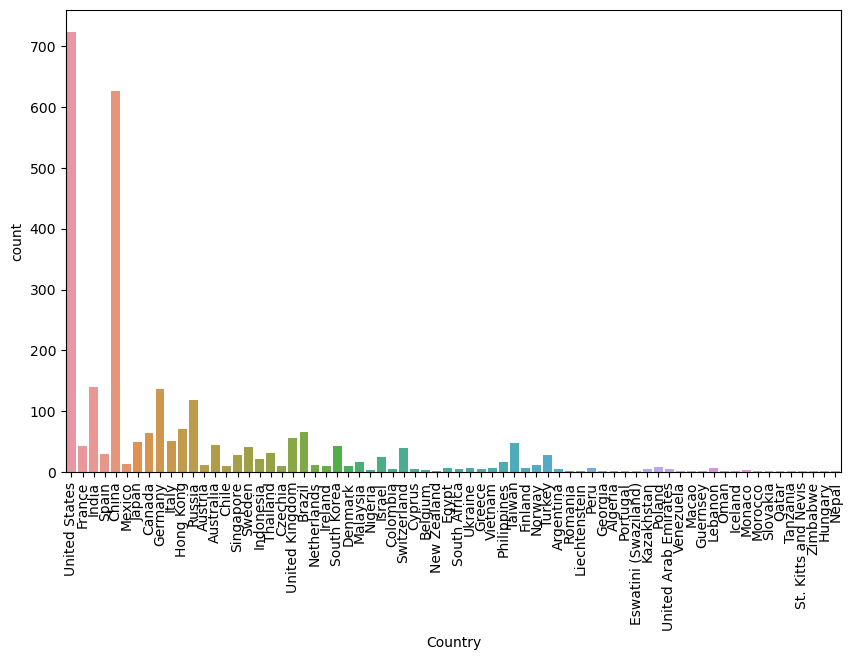

In [88]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Country',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<Axes: >

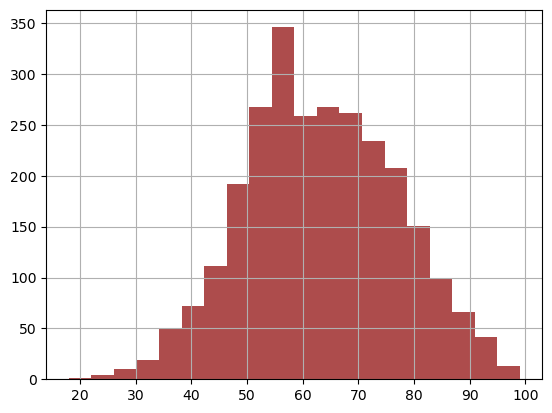

In [89]:
df['Age'].hist(bins=20,color='darkred',alpha=0.7)

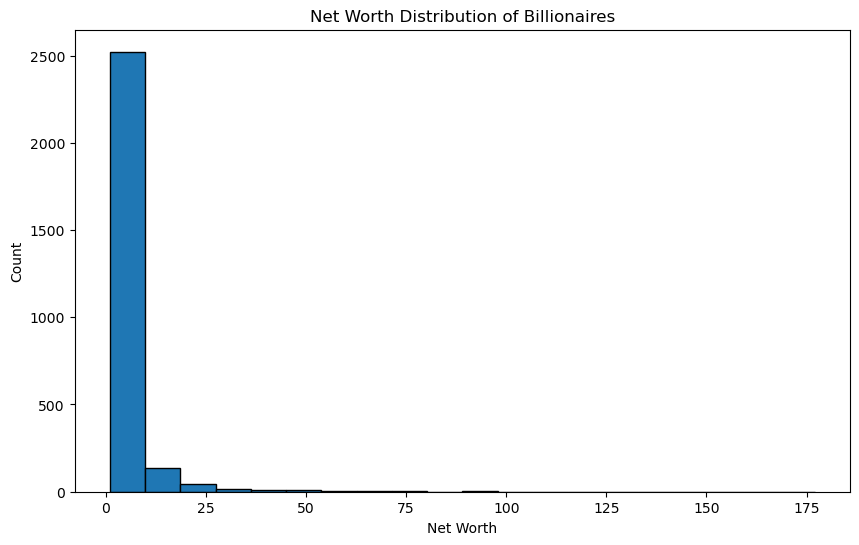

In [90]:
# Extract the net worth values
net_worth_values = df['NetWorth']

# Calculate summary statistics
mean_net_worth = net_worth_values.mean()
median_net_worth = net_worth_values.median()
std_net_worth = net_worth_values.std()

# Visualize the distribution with a histogram
plt.figure(figsize=(10, 6))
plt.hist(net_worth_values, bins=20, edgecolor='black')
plt.xlabel('Net Worth')
plt.ylabel('Count')
plt.title('Net Worth Distribution of Billionaires')
plt.show()

In [91]:
# Analyze skewness and kurtosis
skewness = net_worth_values.skew()
kurtosis = net_worth_values.kurtosis()

# Calculate percentiles
percentiles = [0.25, 0.5, 0.75, 0.9, 0.99]
net_worth_percentiles = net_worth_values.quantile(percentiles)

# Print summary statistics, skewness, kurtosis, and percentiles
print("Summary Statistics:")
print(f"Mean: {mean_net_worth:.2f}")
print(f"Median: {median_net_worth:.2f}")
print(f"Standard Deviation: {std_net_worth:.2f}")
print()
print("Skewness and Kurtosis:")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")
print()
print("Net Worth Percentiles:")
for percentile, value in zip(percentiles, net_worth_percentiles):
    print(f"{percentile * 100}%: {value:.2f}")

Summary Statistics:
Mean: 4.75
Median: 2.30
Standard Deviation: 9.62

Skewness and Kurtosis:
Skewness: 8.68
Kurtosis: 105.55

Net Worth Percentiles:
25.0%: 1.50
50.0%: 2.30
75.0%: 4.20
90.0%: 8.70
99.0%: 45.86


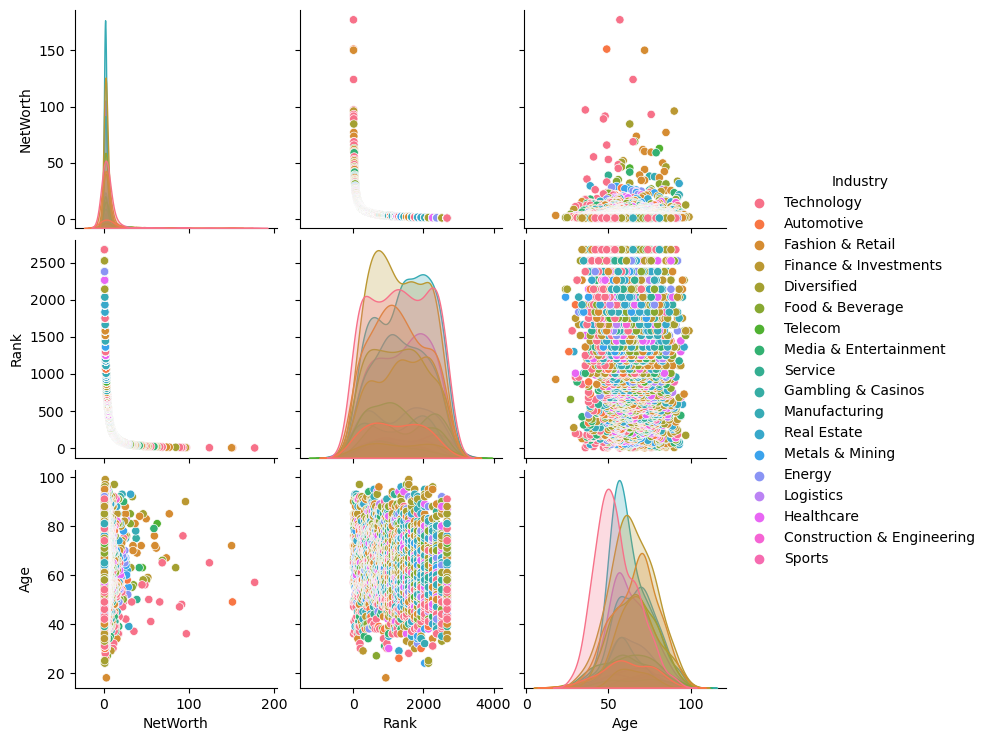

In [92]:
sns.pairplot(df,hue='Industry')

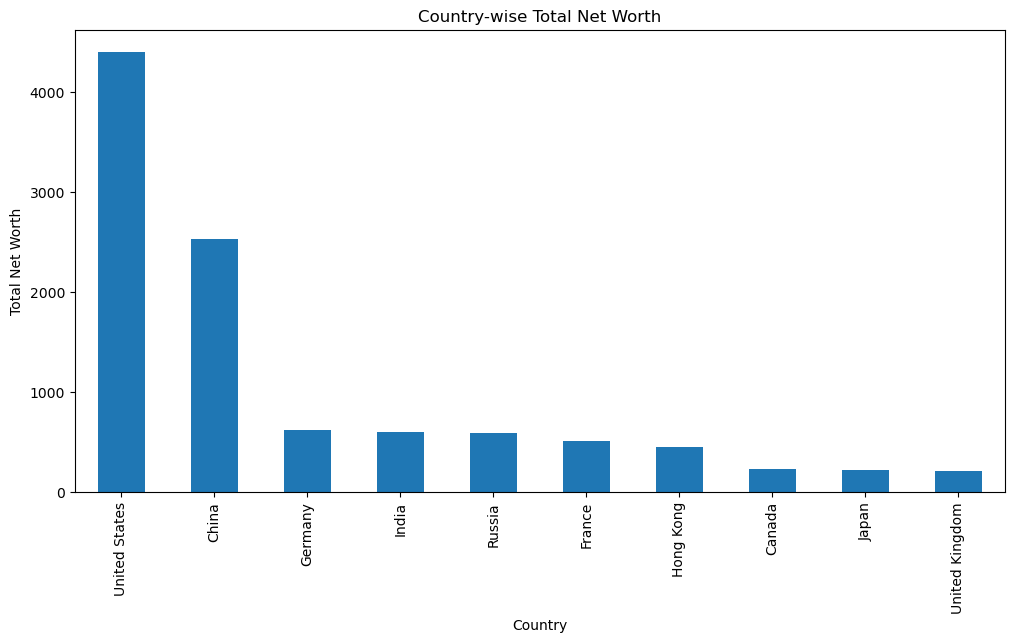

In [93]:
country_networth = df.groupby('Country')['NetWorth'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for country-wise net worth
plt.figure(figsize=(12, 6))
country_networth.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Net Worth')
plt.title('Country-wise Total Net Worth')
plt.xticks(rotation=90)
plt.show()

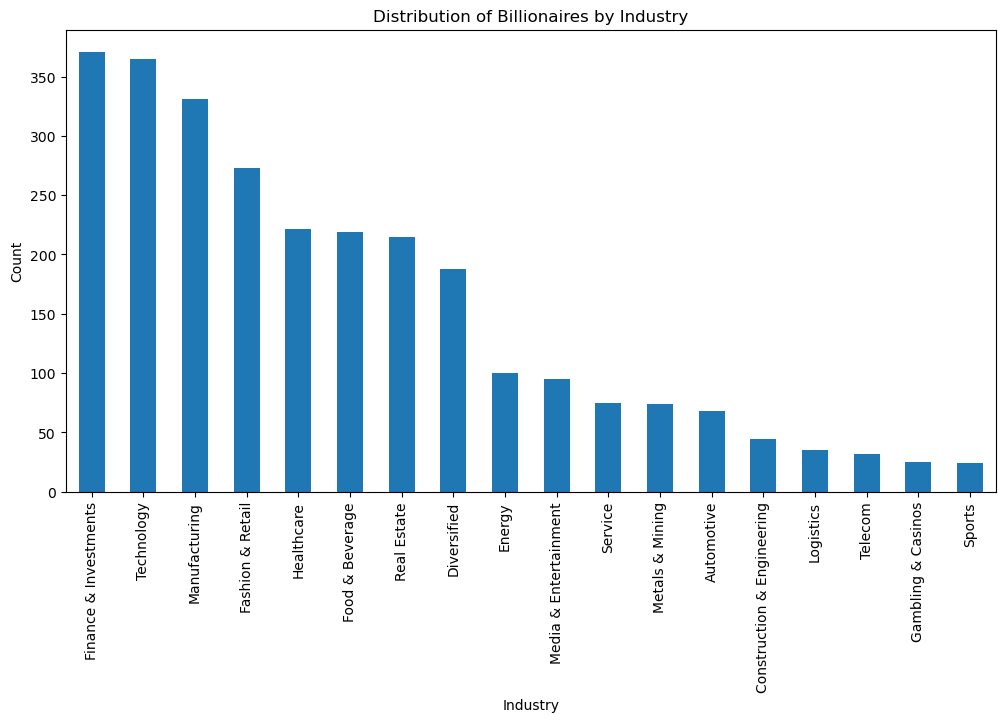

In [94]:
# Perform industry-wise analysis
industry_counts = df['Industry'].value_counts()

# Create a bar plot to visualize the industry distribution
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Distribution of Billionaires by Industry')
plt.xticks(rotation=90)
plt.show()

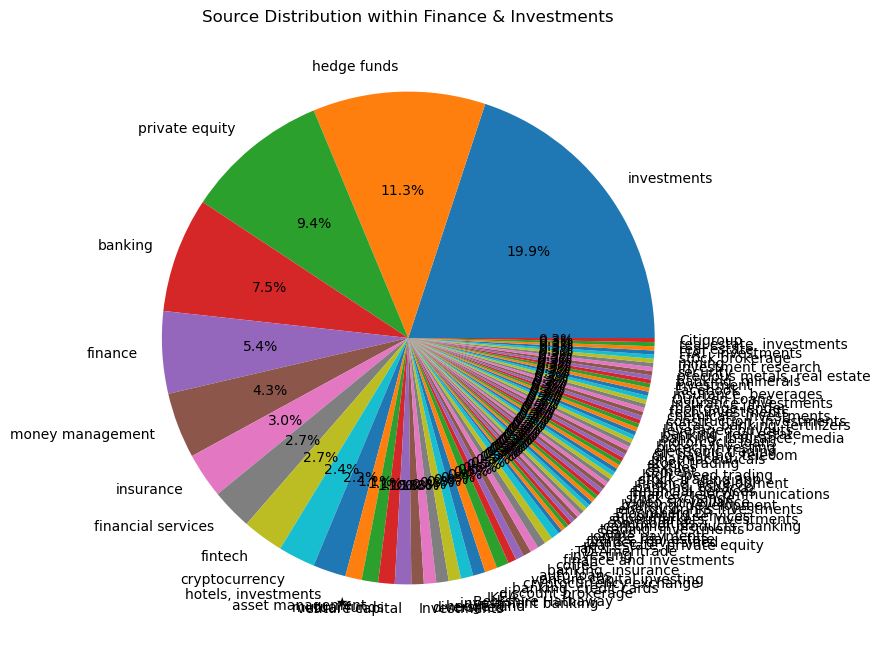

In [95]:
# Select a specific industry
industry = "Finance & Investments"

# Filter the dataset for the selected industry
filtered_df = df[df['Industry'] == industry]

# Calculate the count of each source within the industry
source_counts = filtered_df['Source'].value_counts()

# Create a pie chart to visualize the source distribution
plt.figure(figsize=(8, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%')
plt.title(f"Source Distribution within {industry}")
plt.show()




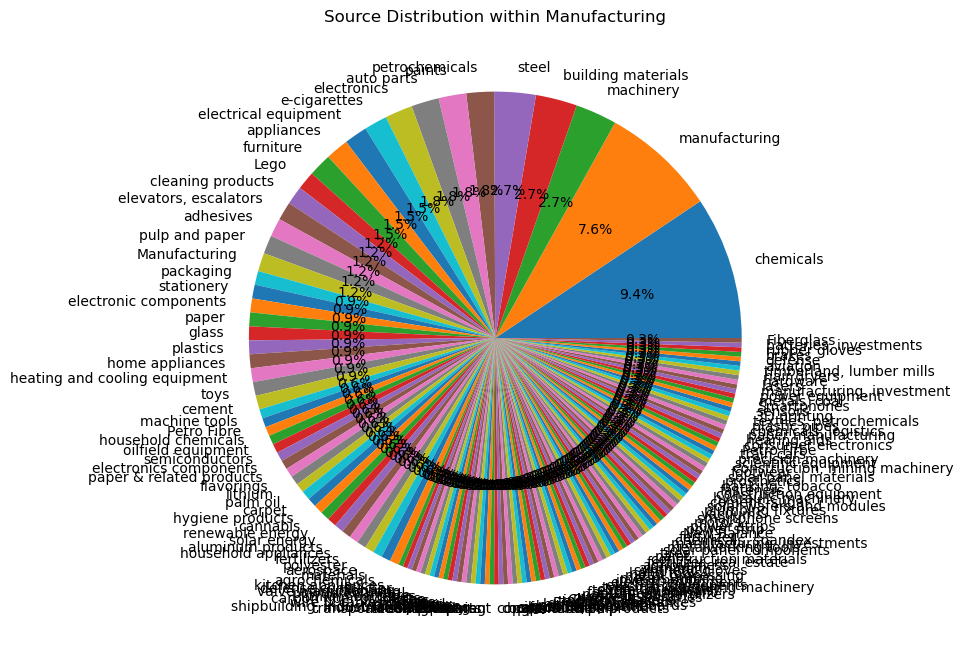

In [96]:
# Select a specific industry
industry = "Manufacturing"

# Filter the dataset for the selected industry
filtered_df = df[df['Industry'] == industry]

# Calculate the count of each source within the industry
source_counts = filtered_df['Source'].value_counts()

# Create a pie chart to visualize the source distribution
plt.figure(figsize=(8, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%')
plt.title(f"Source Distribution within {industry}")
plt.show()

/tmp/ipykernel_32/3272811672.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop('Rank',axis=1).corr()


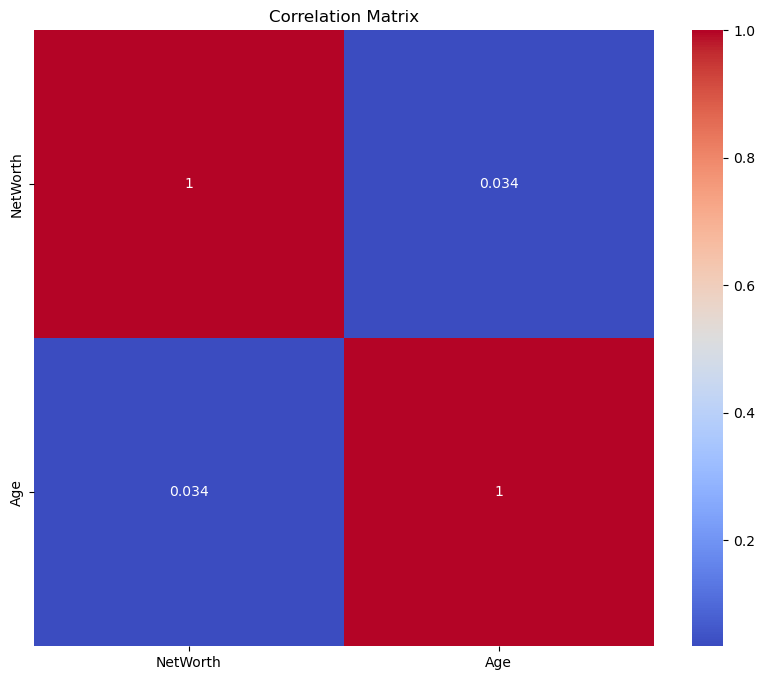

In [97]:
# Select the variables of interest
#variables_of_interest = ['Age', 'NetWorth', 'Industry', 'Source']

# Create a correlation matrix
correlation_matrix = df.drop('Rank',axis=1).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

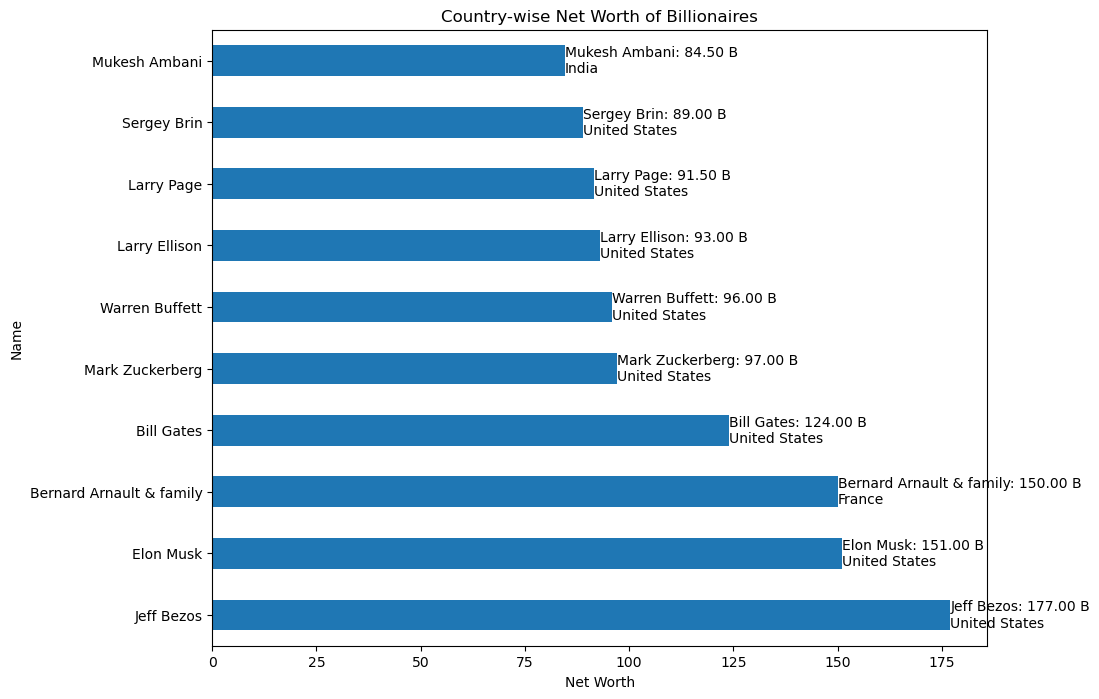

In [98]:
# Calculate the total net worth for each country
country_networth = df.groupby('Name')['NetWorth'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot for country-wise net worth
plt.figure(figsize=(10, 8))
country_networth.plot(kind='barh')
plt.xlabel('Net Worth')
plt.ylabel('Name')
plt.title('Country-wise Net Worth of Billionaires')

# Add the names of billionaires to the plot
for i, (networth, country) in enumerate(zip(country_networth, country_networth.index)):
    names = df[df['Name'] == country]['Country']
    names_str = ", ".join(names)
    plt.text(networth, i, f'{country}: {networth:.2f} B\n{names_str}', va='center')

plt.show()

In [99]:
# Group the data by industry and source and calculate the total net worth
industry_source_networth = df.groupby(['Industry', 'Source'])['NetWorth'].sum()

# Find the combination with the highest net worth
max_networth_index = industry_source_networth.idxmax()
max_networth = industry_source_networth[max_networth_index]

# Extract the industry and source with the highest net worth
industry_with_highest_networth, source_with_highest_networth = max_networth_index


# Print the industry and source with the highest net worth
print(f"The industry with the highest net worth is {industry_with_highest_networth} "
      f"and the source with the highest net worth in that industry is {source_with_highest_networth}.")
print(f"The net worth for this combination is {max_networth}.")

The industry with the highest net worth is Real Estate and the source with the highest net worth in that industry is real estate.
The net worth for this combination is 677.9.


In [100]:
mean_age_by_group = df.groupby(['Source', 'Industry'])['Age'].mean()
mean_age_by_group

# Fill in missing age values based on 'Source' and 'Industry'
for index, row in df.iterrows():
    if pd.isnull(row['Age']):
        source = row['Source']
        industry = row['Industry']
        if (source, industry) in mean_age_by_group:
            df.at[index, 'Age'] = mean_age_by_group[(source, industry)]

 **We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the billionaires who are in similar Industry and Source (imputation).**

<Axes: >

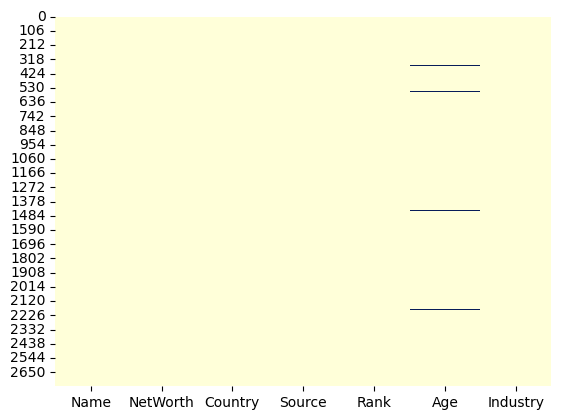

In [101]:
sns.heatmap(df.isnull(),cmap='YlGnBu', cbar=False)

In [102]:
df.dropna(inplace=True)


In [103]:
from sklearn.cluster import KMeans

In [104]:
# Select the numerical variables for clustering analysis
numerical_variables = ['NetWorth', 'Age']

# Subset the DataFrame with the selected variables
data = df[numerical_variables]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


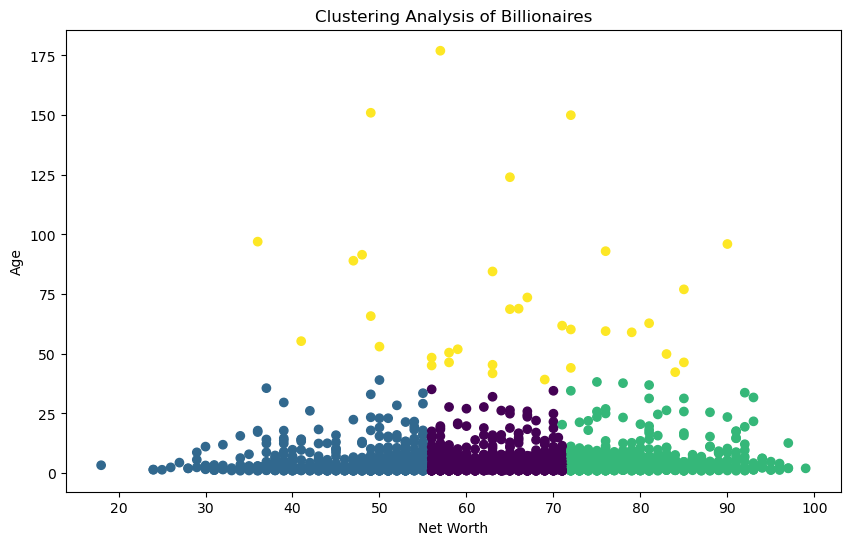

In [105]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

# Assign cluster labels to the data points
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Analyze the characteristics of each cluster
cluster_characteristics = df.groupby('Cluster')[numerical_variables].mean()

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'],data['NetWorth'],  c=cluster_labels, cmap='viridis')
plt.xlabel('Net Worth')
plt.ylabel('Age')
plt.title('Clustering Analysis of Billionaires')
plt.show()

# **Conclusion**

1) **Real Estate** Industries has the highest number of billionaires or the highest net worth. This industry can generate significant wealth.

2) The 99th percentile is 45.86 billion, indicating that **99% of the billionaires have a net worth of 45.86 billion or less.**

3) In this case, it implies that **age and net worth are not strongly related** in the dataset you are analyzing.

4) **USA and China** is dominating in the dataset

5) if we take top 10 billionaire most(or all) of them has source of income from **Finance & Investments and Technology**

6) Experience likely plays a role in the net worth of billionaires, particularly in the age **range of 50-60.**